In [1]:
import warnings
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline  

# STEPS FOR BUILDING A MACHINE LEARNING MODEL

In [2]:
# ignore warnings
warnings.filterwarnings('ignore')

## Step 1:Collect Data

In [3]:
# Load digits dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names=['sepal_length','sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(url, names=col_names)

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Step 2: Prepare data

In [5]:
# df = df.values
X = df.iloc[:,0:4] #parameters
y = df.iloc[:,4] #Actual values to be predicted

In [6]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [8]:
#test size
test_size = 0.33

In [9]:
#generate the same set of random numbers
seed = 7

In [10]:
#Split data into train and test set. 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

## Step 3: Choose Model

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model= LogisticRegression(solver='liblinear')

## Step 4: Train Model

In [13]:
model.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [14]:
predicted = model.predict(X_test)


## Step 5: Evaluate the model

In [15]:
## Model evaluation metric using confusion matrix
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
matrix = confusion_matrix(y_test, predicted)

In [16]:
matrix

array([[14,  0,  0],
       [ 0, 14,  4],
       [ 0,  1, 17]])

#### Visualize the Confusion matrix

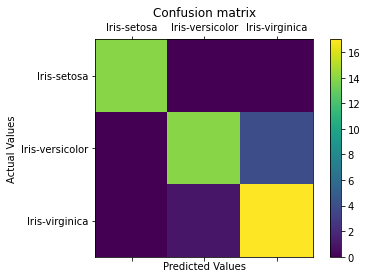

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matrix)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

## Step 6: Make prediction

In [18]:
new_values=[[4, 4, 6, 0.2],[6, 4, 5, 1.1],[6, 2,1, 1.2]]

data_predict=pd.DataFrame(new_values, columns=['sepal_length','sepal_width', 'petal_length', 'petal_width'])

In [19]:
data_predict

,sepal_length,sepal_width,petal_length,petal_width
0,4,4,6,0.2
1,6,4,5,1.1
2,6,2,1,1.2


In [20]:
predicted = model.predict(data_predict)

### Predicted values

In [21]:

print(predicted)

['Iris-virginica' 'Iris-virginica' 'Iris-setosa']
